# Make an Excel Ray file for Beam4


- Geometry : Auxiliary Telescope Geometry of Optical for CTIO 0.9 m 

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : February 28th 2017
- date : March 7th 2017

Simple 2D optical geometry for the optical setup of CTIO 0.9m telescope with Ronchi Grating.
This is a tool to adjust the CCD position wrt Filter wheel.
Here 4 wavelength are generated.
The source incident angle must be provided in terms of angles $(\alpha_x,\alpha_y)$.


This is a python notebook (not a sagemath notebook)
- command:
** ipython notebook **

In [459]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools

In [460]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


## Output filename and desired wavelength

In [461]:
root_filename="Beam4_Rayfile_"

In [462]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y
NWL=4

In [463]:
Wavelength_B=0.0004
Wavelength_G=0.0006
Wavelength_R=0.0008
Wavelength_I=0.001

In [464]:
theta_x=2.0  # angle in arcmin
theta_y=2.  # angle in arcmin 

In [465]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [466]:
Beam4_Rayfile="Beam4_Rayfile_{:d}_allwl_{:d}_{:d}.xlsx".format(NBEAM*NWL,theta_x_num,theta_y_num)

In [467]:
Beam4_Rayfile

'Beam4_Rayfile_484_allwl_0_20.xlsx'

## Constants for conversions

In [468]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [469]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [470]:
deg_to_rad=np.pi/180.

In [471]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_ro_rad=1./rad_to_arcmin

## Configuration parameters at the telescope
--------------------------------------------------------

#### Telescope

In [472]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    

In [473]:
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### Filter

In [474]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

In [475]:
Filt_size

76.19999999999999

#### CCD Detector

In [476]:
Det_xpic=24.0 # microns per pixel
Det_NbPix=2048 # number of pixels per CCD side
Det_size=Det_xpic*Det_NbPix*1e-3 # CCD size in mm, 5 cm or 2 inches

In [477]:
Det_size

49.152

In [478]:
Det_pix_angl=Det_xpic*micr_to_m/Tel_Focal_Length   # in radian

In [479]:
print "pixel viewing angle in arcsec = ", Det_pix_angl*rad_to_deg*arcdeg_to_arcsec

pixel viewing angle in arcsec =  0.392885345233


## Location of the source in the field of view

The Field of view of the delescope is 13.6 arcmin


- ($\theta_x, \theta_y$) in arcmin to be specified
- ($\alpha_x, \alpha_y$) in radian calculated 

In [480]:
theta_max=13.6/2.
theta_max=-13.6/2.

In [481]:
alpha_x=theta_x*arcmin_ro_rad
alpha_y=theta_y*arcmin_ro_rad

## Where to start the tracking of rays

- Units in mm
- The origin is where the optical effective conveging system start at O(0,0,0)
- (X0,Y0,Z0) : coordinates of Beam rays starting points

In [482]:
D0=Filt_D*m_to_mm  # distance between plane where the trcking beam start

In [483]:
Z0=Tel_Focal_Length*m_to_mm

In [484]:
Z1=Z0-2.*D0  # please set where you want to start the beam

In [485]:
XMIN=-Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))
XMAX=Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))

In [486]:
YMIN=-Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))
YMAX=Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))

# Number of points

In [487]:
X = np.linspace(XMIN, XMAX, NBEAM_X)
Y = np.linspace(YMIN, YMAX, NBEAM_Y)
XX, YY = np.meshgrid(X, Y)

In [488]:
pts = itertools.product(X, Y)

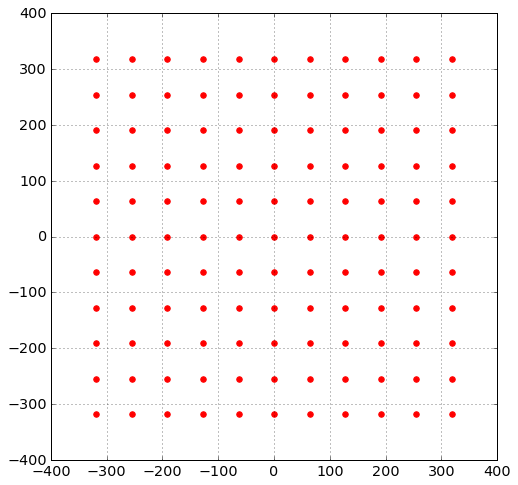

In [489]:
plt.grid()
plt.scatter(*zip(*pts), marker='o', s=30, color='red')

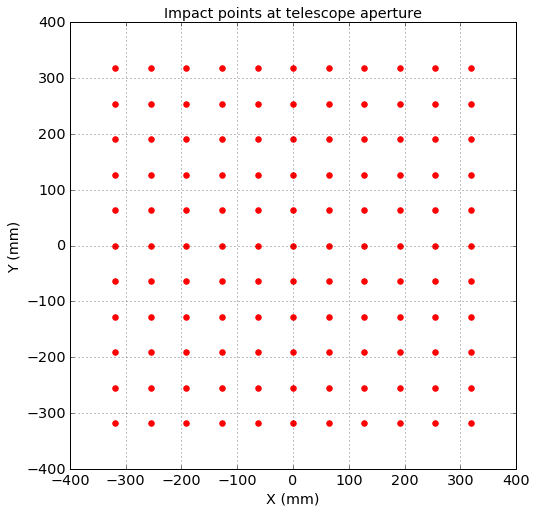

In [490]:
plt.scatter(XX,YY, marker='o', s=30, color='red')
#plt.ylim(YMIN,YMAX)
#plt.xlim(XMIN,XMAX)
plt.grid()
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.title("Impact points at telescope aperture")

In [491]:
def GetCosinusDirector(X,Y,thealpha_x,thealpha_y,f):
    """
    The size of X,Y is the number of Rays
    """
    
    
    Norm=np.sqrt( np.power(X+f*np.tan(thealpha_x),2) + np.power(Y+f*np.tan(thealpha_y),2)+ f**2)
    UX=-(X+f*np.tan(thealpha_x))/Norm
    UY=-(Y+f*np.tan(thealpha_y))/Norm
    UZ=f/Norm
    return UX,UY,UZ    
    

In [492]:
UX,UY,UZ=GetCosinusDirector(XX,YY,alpha_x,alpha_y,Z0)

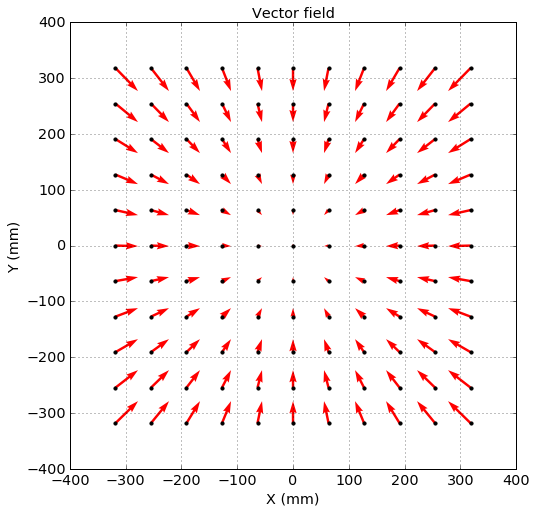

In [493]:

plt.grid()
q = plt.quiver(XX,YY,UX,UY,angles='xy',scale=0.5,color='r')
plt.scatter(XX,YY, marker='o', s=10, color='black')
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.title("Vector field")

In [494]:
def GetStartingPoint(X,Y,thealpha_x,the_alpha_y,f,Z0):
    theX0=(1-Z0/f)*X-Z0*np.tan(alpha_x)
    theY0=(1-Z0/f)*Y-Z0*np.tan(alpha_y)
    return theX0,theY0
    

In [495]:
(X0,Y0)=GetStartingPoint(XX,YY,alpha_x,alpha_y,Z0,Z1)

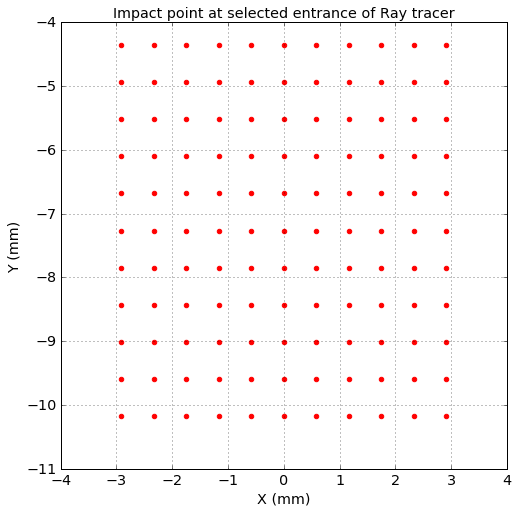

In [496]:
plt.scatter(X0,Y0, marker='o', s=20, color='red')
plt.grid()
#plt.ylim(YMIN,YMAX)
#plt.xlim(XMIN,XMAX)

#plt.xlim(-Filt_size/2, Filt_size/2)
#plt.ylim(-Filt_size/2, Filt_size/2)

plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.title("Impact point at selected entrance of Ray tracer")

## Create Dataframe

In [497]:
df = pd.DataFrame()

In [498]:
Xout=X0.flatten()
Yout=Y0.flatten()

In [499]:
Uout=UX.flatten()
Vout=UY.flatten()
Wout=UZ.flatten()

In [500]:
Zout=np.zeros(NBEAM)

In [501]:
allXout=np.concatenate((Xout,Xout,Xout,Xout))
allYout=np.concatenate((Yout,Yout,Yout,Yout))
allZout=np.concatenate((Zout,Zout,Zout,Zout))

In [502]:
allUout=np.concatenate((Uout,Uout,Uout,Uout))
allVout=np.concatenate((Vout,Vout,Vout,Vout))
allWout=np.concatenate((Wout,Wout,Wout,Wout))

In [503]:
wave_b=Wavelength_B*np.ones(NBEAM)
color_b = np.chararray(NBEAM)
color_b[:]='b'

In [504]:
wave_g=Wavelength_G*np.ones(NBEAM)
color_g = np.chararray(NBEAM)
color_g[:]='g'

In [505]:
wave_r=Wavelength_R*np.ones(NBEAM)
color_r = np.chararray(NBEAM)
color_r[:]='r'

In [506]:
wave_i=Wavelength_I*np.ones(NBEAM)
color_i = np.chararray(NBEAM)
color_i[:]='k'

In [507]:
Wave=np.concatenate((wave_b,wave_g,wave_r,wave_i))

In [508]:
allcolor=np.concatenate((color_b,color_g,color_r,color_i))

In [509]:
allcolor.shape

(484,)

In [510]:
df["X0"]=allXout
df["Y0"]=allYout
df["Z0"]=allZout
df["U0"]=allUout
df["V0"]=allVout
df["W0"]=allWout
df["wave"]=Wave
df["col"]=allcolor

In [511]:
df

,X0,Y0,Z0,U0,V0,W0,wave,col
0,-2.913785,-10.177043,0.0,0.025238,0.024657,0.999377,0.0004,b
1,-2.331028,-10.177043,0.0,0.020193,0.024660,0.999492,0.0004,b
2,-1.748271,-10.177043,0.0,0.015146,0.024662,0.999581,0.0004,b
3,-1.165514,-10.177043,0.0,0.010098,0.024663,0.999645,0.0004,b
4,-0.582757,-10.177043,0.0,0.005049,0.024664,0.999683,0.0004,b
5,0.000000,-10.177043,0.0,-0.000000,0.024665,0.999696,0.0004,b
6,0.582757,-10.177043,0.0,-0.005049,0.024664,0.999683,0.0004,b
7,1.165514,-10.177043,0.0,-0.010098,0.024663,0.999645,0.0004,b
8,1.748271,-10.177043,0.0,-0.015146,0.024662,0.999581,0.0004,b
9,2.331028,-10.177043,0.0,-0.020193,0.024660,0.999492,0.0004,b


In [512]:
print Beam4_Rayfile

Beam4_Rayfile_484_allwl_0_20.xlsx


In [513]:
df.to_excel(Beam4_Rayfile)

In [514]:
Filt_size

76.19999999999999

In [515]:
2*Filt_D*m_to_mm

115.38